In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

/home/sarai/.virtualenvs/relief/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
import sklearn
sklearn.__version__

'0.22'

In [4]:
genetic_data = pd.read_csv('https://github.com/EpistasisLab/scikit-rebate/raw/master/data/'
                           'GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1.tsv.gz',
                           sep='\t', compression='gzip')
genetic_data

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N11,N12,N13,N14,N15,N16,N17,P1,P2,class
0,0,0,2,1,1,0,0,2,0,1,...,2,1,0,0,0,0,0,0,1,1
1,0,0,1,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,1,0,2,0,0,0,0,...,1,1,0,0,2,2,0,0,0,1
3,0,1,0,2,0,1,0,2,0,0,...,1,1,0,1,1,0,1,1,0,1
4,0,0,1,1,0,0,0,1,1,0,...,1,0,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
1596,0,1,1,2,0,1,1,1,1,1,...,1,1,0,0,1,0,2,1,1,0
1597,0,0,1,2,1,1,0,0,0,0,...,0,0,0,0,2,0,1,0,0,0
1598,0,1,0,1,0,0,0,1,0,1,...,0,1,0,0,0,1,0,1,1,0


In [7]:
features, labels = genetic_data.drop('class', axis=1).values, genetic_data['class'].values
headers = list(genetic_data.drop("class", axis=1))
fs = ReliefF(n_features_to_select=2, n_neighbors=100, verbose=True)
fs.fit(features, labels)

# for feature_name, feature_score in zip(genetic_data.drop('class', axis=1).columns, fs.feature_importances_):
#     print(feature_name, '\t', feature_score)
    
scoreDict = {}
for feature_name, feature_score in zip(genetic_data.drop('class', axis=1).columns, fs.feature_importances_):
    scoreDict[feature_name] = feature_score

sorted_names = sorted(scoreDict, key=lambda x: scoreDict[x], reverse=True)
for name in sorted_names:
    print(name, scoreDict[name])

Created distance array in 0.03763246536254883 seconds.
Feature scoring under way ...
Completed scoring in 8.288999319076538 seconds.
P2 0.12228125000000005
P1 0.11928750000000017
N0 -0.0003062500000000015
N10 -0.0005937499999999997
N13 -0.003162500000000005
N14 -0.0031750000000000038
N1 -0.004956249999999998
N8 -0.006075000000000006
N12 -0.006918750000000017
N16 -0.0070499999999999894
N4 -0.0076812500000000075
N17 -0.007900000000000004
N9 -0.007968750000000009
N3 -0.007999999999999995
N11 -0.008324999999999999
N5 -0.008356249999999997
N2 -0.009412499999999994
N7 -0.00959375
N6 -0.010131249999999996
N15 -0.010206250000000007


In [8]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

genetic_data = pd.read_csv('https://github.com/EpistasisLab/scikit-rebate/raw/master/data/'
                           'GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1.tsv.gz',
                           sep='\t', compression='gzip')

features, labels = genetic_data.drop('class', axis=1).values, genetic_data['class'].values

clf = make_pipeline(ReliefF(n_features_to_select=2, n_neighbors=100),
                    RandomForestClassifier(n_estimators=100))

print(np.mean(cross_val_score(clf, features, labels)))

0.7931250000000001


In [12]:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scores = cross_val_score(clf, features, labels)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(clf, features, labels, scoring='f1')
print("F1: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(clf, features, labels, scoring='precision')
print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(clf, features, labels, scoring='recall')
print("Recall: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(clf, features, labels, scoring='roc_auc')
print("ROC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.79 (+/- 0.03)
F1: 0.75 (+/- 0.04)
Precision: 0.94 (+/- 0.03)
Recall: 0.63 (+/- 0.06)
ROC: 0.85 (+/- 0.03)


# Univariate feature selection
Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator.

In [36]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(features, labels)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(genetic_data.drop('class', axis=1).columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.sort_values("Score", ascending=True)
# featureScores

,Specs,Score
16,N16,0.001468
19,P2,0.013910
10,N10,0.022222
7,N7,0.030875
15,N15,0.033771
6,N6,0.044776
8,N8,0.088288
12,N12,0.105882
3,N3,0.158117
14,N14,0.171930


# Feature selection using SelectFromModel
https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-using-selectfrommodel
- Compute impurity-based feature importances, which in turn can be used to discard irrelevant features

[0.00722319 0.03508119 0.05606039 0.06271973 0.04665016 0.05216606
 0.05620965 0.0591038  0.04445539 0.04426221 0.00900429 0.05037564
 0.04865002 0.01660246 0.03053116 0.05772528 0.04730836 0.05788272
 0.09886506 0.11912324]


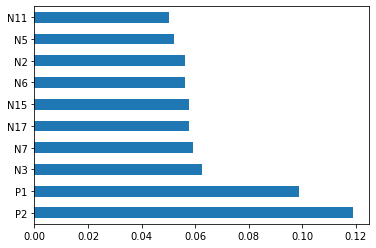

In [39]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(features, labels)

print(model.feature_importances_)


feat_importances = pd.Series(model.feature_importances_, index=genetic_data.drop('class', axis=1).columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Correlation Matrix with Heatmap

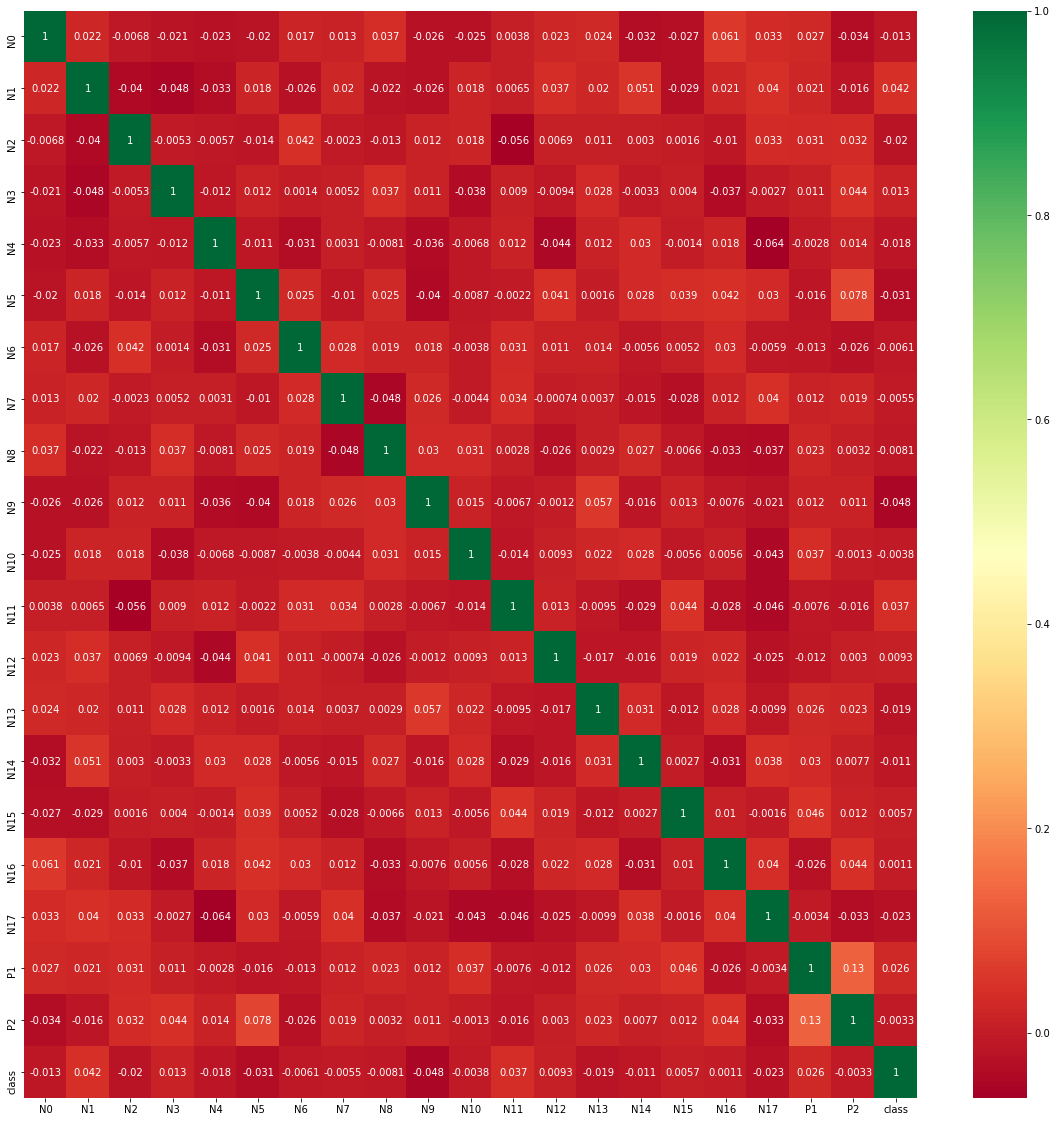

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns

#get correlations of each features in dataset
corrmat = genetic_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(genetic_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [52]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = ExtraTreesClassifier()

selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(features, labels)
selector.support_

for i in zip(selector.support_,  genetic_data.drop('class', axis=1).columns):
    print(i)
    
for i, value in enumerate(selector.ranking_):
    print(genetic_data.drop('class', axis=1).columns[i], value)

(False, 'N0')
(False, 'N1')
(True, 'N2')
(True, 'N3')
(False, 'N4')
(False, 'N5')
(True, 'N6')
(True, 'N7')
(False, 'N8')
(False, 'N9')
(False, 'N10')
(True, 'N11')
(True, 'N12')
(False, 'N13')
(False, 'N14')
(True, 'N15')
(False, 'N16')
(True, 'N17')
(True, 'P1')
(True, 'P2')
N0 11
N1 7
N2 1
N3 1
N4 6
N5 2
N6 1
N7 1
N8 5
N9 4
N10 10
N11 1
N12 1
N13 9
N14 8
N15 1
N16 3
N17 1
P1 1
P2 1


chi squared is a univariate statistical measure that can be used to rank features, whereas RFE tests different subsets of features.